In [20]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("Week2-3_Data_Processing.csv")

# Quick look at the dataset
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20837 non-null  object 
 1   Transaction_ID         20837 non-null  object 
 2   Company_ID             20837 non-null  object 
 3   Product_ID             20837 non-null  object 
 4   Quantity               20837 non-null  object 
 5   Transaction_Date       5342 non-null   object 
 6   Product_Price_x        20837 non-null  object 
 7   Total_Cost             20837 non-null  float64
 8   Company_Name           19867 non-null  object 
 9   Company_Profit         19867 non-null  object 
 10  Address                19867 non-null  object 
 11  Product_Name           19196 non-null  object 
 12  Product_Price_y        19196 non-null  object 
 13  total_transactions     20837 non-null  int64  
 14  total_spent            20837 non-null  float64
 15  av

,Total_Cost,total_transactions,total_spent,avg_transaction_value,recency_days,frequent_buyer
count,2.083700e+04,20837.000000,2.083700e+04,2.083700e+04,5342.000000,20837.000000
mean,3.205405e-17,5780.900274,7.499728e+09,-2.046003e-17,733.189068,0.906800
std,1.000024e+00,5408.553160,7.018923e+09,1.000024e+00,415.462581,0.290719
min,-1.374399e+00,79.000000,8.582560e+07,-6.622771e-01,0.000000,0.000000
25%,-8.358764e-01,100.000000,1.304128e+08,-6.533764e-01,370.500000,1.000000
50%,-8.194471e-02,10930.000000,1.418194e+10,-6.392012e-01,720.000000,1.000000
75%,6.360855e-01,10930.000000,1.418194e+10,5.142580e-01,1102.000000,1.000000
max,3.412469e+00,10930.000000,1.418194e+10,5.342955e+00,1460.000000,1.000000


In [3]:
# Check missing values
df.isnull().sum()


Unnamed: 0                   0
Transaction_ID               0
Company_ID                   0
Product_ID                   0
Quantity                     0
Transaction_Date         15495
Product_Price_x              0
Total_Cost                   0
Company_Name               970
Company_Profit             970
Address                    970
Product_Name              1641
Product_Price_y           1641
total_transactions           0
total_spent                  0
avg_transaction_value        0
recency_days             15495
frequent_buyer               0
dtype: int64

In [4]:
# Fill categorical missing values
df['Company_Name'] = df['Company_Name'].fillna('Unknown')
df['Address'] = df['Address'].fillna('Unknown')
df['Product_Name'] = df['Product_Name'].fillna('Unknown Product')

# Fill numerical missing values
df['Company_Profit'] = df['Company_Profit'].fillna(0)

# Handle Product_Price_y
df['Product_Price_y'] = df['Product_Price_y'].fillna(df['Product_Price_x'])


In [5]:
# Drop rows with missing Transaction_Date (needed for recency)
df = df.dropna(subset=['Transaction_Date'])

# Convert Transaction_Date to datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Recalculate recency_days
reference_date = df['Transaction_Date'].max()
df['recency_days'] = (reference_date - df['Transaction_Date']).dt.days

# Check remaining missing values
df.isnull().sum()

Unnamed: 0               0
Transaction_ID           0
Company_ID               0
Product_ID               0
Quantity                 0
Transaction_Date         0
Product_Price_x          0
Total_Cost               0
Company_Name             0
Company_Profit           0
Address                  0
Product_Name             0
Product_Price_y          0
total_transactions       0
total_spent              0
avg_transaction_value    0
recency_days             0
frequent_buyer           0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop ID and non-predictive columns
X = df.drop([
    'frequent_buyer',
    'Transaction_ID',
    'Company_ID',
    'Product_ID',
    'Company_Name',
    'Address',
    'Product_Name',
    'Transaction_Date'
], axis=1)

y = df['frequent_buyer']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
X.dtypes


Unnamed: 0                object
Quantity                  object
Product_Price_x           object
Total_Cost               float64
Company_Profit            object
Product_Price_y           object
total_transactions         int64
total_spent              float64
avg_transaction_value    float64
recency_days               int64
dtype: object

In [8]:
cols_to_convert = [
    'Quantity',
    'Product_Price_x',
    'Company_Profit',
    'Product_Price_y'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [9]:
df[cols_to_convert] = df[cols_to_convert].fillna(0)


In [10]:
df = df.drop(columns=['Unnamed: 0'])


In [11]:
X = df.select_dtypes(include=['int64', 'float64'])
y = X['frequent_buyer']
X = X.drop('frequent_buyer', axis=1)


In [12]:
X.dtypes


Quantity                 float64
Product_Price_x          float64
Total_Cost               float64
Company_Profit           float64
Product_Price_y          float64
total_transactions         int64
total_spent              float64
avg_transaction_value    float64
recency_days               int64
dtype: object

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9925163704396632

Confusion Matrix:
 [[102   7]
 [  1 959]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       109
           1       0.99      1.00      1.00       960

    accuracy                           0.99      1069
   macro avg       0.99      0.97      0.98      1069
weighted avg       0.99      0.99      0.99      1069



In [16]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance

,Feature,Coefficient
2,Total_Cost,8.865694
7,avg_transaction_value,4.840381
5,total_transactions,0.442968
6,total_spent,0.438531
4,Product_Price_y,0.219933
3,Company_Profit,0.110041
1,Product_Price_x,-0.166256
8,recency_days,-0.192383
0,Quantity,-3.075900


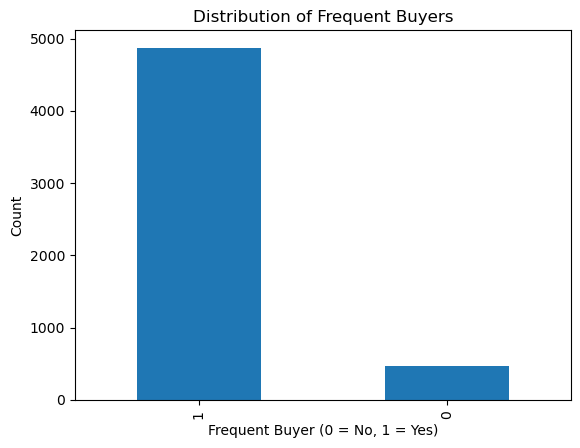

In [21]:
df['frequent_buyer'].value_counts().plot(kind='bar')

plt.title('Distribution of Frequent Buyers')
plt.xlabel('Frequent Buyer (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [23]:
features = X_train.columns


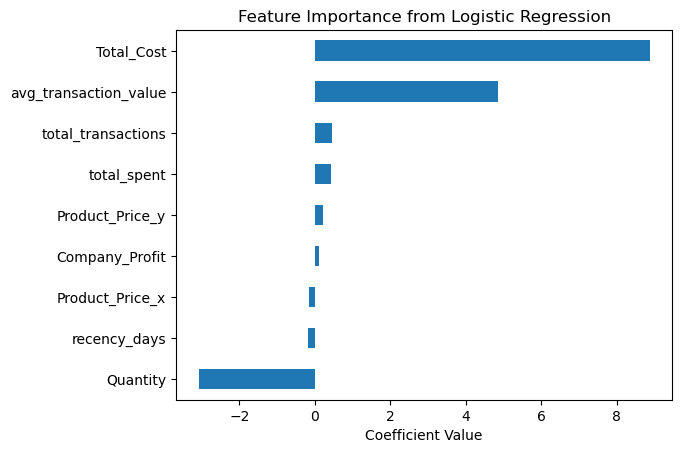

In [24]:
feature_importance = pd.Series(
    model.coef_[0],
    index=features
).sort_values()

feature_importance.plot(kind='barh')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.show()
